# Numpy笔记

## 1.1 Introduction

在numpy中, 向量, 矩阵和多维数据集都是ndarray(也可以直接叫array). 使用numpy需要导入numpy模块, 如下：

In [2]:
import numpy as np

## 1.2 Creating numpy arrays

有很多种构造一个向量或矩阵的方法，例如：
- 使用list或tuples构造
- 使用numpy中提供的函数
- 从文件中读取数据

### 1.2.1 使用tuple构造矩阵
我们可以使用numpy的**array**函数和python中的tuple来构造向量或者矩阵.

In [3]:
# 构造一个向量, 传入的参数t是一个tuple
t = (2,3)
vec = np.array(t)
vec

array([2, 3])

In [4]:
# 构造一个矩阵, 传入的参数t是一个tuple
t = ((1,2,3),(4,5,6))
mtrx = np.array(t)
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

我们可以使用python中的**type**函数来查看一个变量的类型:

In [5]:
print(type(vec))
print(type(mtrx))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


上面构造的是一个$2\times3$的矩阵, 如果构造矩阵时, 输入的维度不一致, 如:

In [6]:
t = ((1,2,3), (4,5))
vec = np.array(t)
vec

array([(1, 2, 3), (4, 5)], dtype=object)

numpy会将(1,2,3)看成一个元素, (4,5)看成一个元素. 此时的结果就不是一个矩阵, 而是一个向量, 该向量由两个元素, 第一个元素是(1,2,3), 第二个元素是(4,5). 上面输出结果中的dtype代表组成该矩阵或向量元素的类型. 在这个例子中, 组成该向量的元素为一个python对象(tuple), 所以dtype=object. 我们也可以使用python中的type方法看一下这个object具体是什么.

In [7]:
print(type(vec[0]))
print(type(vec[1]))

<class 'tuple'>
<class 'tuple'>


np.array中的元素必须是同一数据类型, 例如:

In [8]:
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

矩阵中的元素都是整型, 我们可以使用dtype来查看:

In [9]:
mtrx.dtype

dtype('int64')

若在构造矩阵时, 输入的类型不一致, 则numpy可以对其进行数据类型转换, 例如:

In [10]:
t = ((1,2,"a"),(4,5,6))
mtrx = np.array(t)
mtrx

array([['1', '2', 'a'],
       ['4', '5', '6']], 
      dtype='<U21')

我们可以在构造矩阵时传入dtype参数, 用来指定该矩阵元素的类型:

In [11]:
mtrx = np.array([[1,2,3], [4,5,6]], dtype=float)
mtrx

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

一些常见的数据类型都可以用在dtype: int, float, complex, bool, object等等。
我们也可以指定数据类型的位数大小：int64, int16, float128, complex128。

如果我们赋值一个不一致的类型, 则会报ValueError错误. 例如, 我们将上面矩阵的第一行第一列的元素赋值为"a":

In [12]:
mtrx[0,0] = "a"

ValueError: could not convert string to float: 'a'

### 1.2.2 使用list构造矩阵
除了tuple, 我们还可以使用python中的list来构造向量或矩阵。

In [14]:
# 构造一个向量, 传入的参数li是一个list
li = [1,2,3,4]
vec = np.array(li)
vec

array([1, 2, 3, 4])

In [15]:
# 构造一个矩阵, 传入的参数li是一个list
li = [[1, 2, 3], [2, 3, 4]]
mtrx = np.array(li)
mtrx

array([[1, 2, 3],
       [2, 3, 4]])

对于一个矩阵来说, 我们可以使用ndarray的**shape**属性或者numpy中的**shape()**函数来查看行列数:

In [16]:
print(mtrx.shape)
print(np.shape(mtrx))

(2, 3)
(2, 3)


从结果可以看出, 这是一个2行3列的矩阵. 而对于一个向量来说,它的shape为:

In [17]:
print(vec)
print(vec.shape)

[1 2 3 4]
(4,)


In [18]:
v.shape

NameError: name 'v' is not defined

ndarray还有一个**size**属性, 表示该矩阵或向量的元素个数. 

In [19]:
print(mtrx)
print(mtrx.size)

[[1 2 3]
 [2 3 4]]
6


可以使用**itemsize**查看每个元素所占空间(bytes):

In [20]:
mtrx.itemsize

8

### 1.2.3 使用特定函数生成矩阵
前面我们讲的方法只适用于构造比较小的矩阵, 如果想要构造比较大的矩阵, 使用前面的方法就太低效了. 还好numpy提供了一些函数, 利用这些函数我们可以快速的构造不同形式的矩阵.

#### arange

第一个参数为起始位置, 第二个参数为结束位置(不包含), 第三个参数为跨度.

In [21]:
vec = np.arange(0, 10, 1)
vec

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

跨度也可以使用小数

In [22]:
vec = np.arange(1, 5, 0.5)
vec

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

#### linspace

第一个参数为起始位置, 第二个参数为结束位置(包含), 第三个参数为总元素个数.

In [23]:
np.linspace(0, 10, 10)

array([  0.        ,   1.11111111,   2.22222222,   3.33333333,
         4.44444444,   5.55555556,   6.66666667,   7.77777778,
         8.88888889,  10.        ])

#### random

In [49]:
from numpy import random

每个元素为[0,1]随机数

In [25]:
random.rand(3,3)

array([[ 0.3041989 ,  0.3047154 ,  0.07448279],
       [ 0.75711504,  0.75716051,  0.28739906],
       [ 0.21289917,  0.12862183,  0.21441408]])

服从标准正态分布的随机数

In [26]:
random.randn(3,3)

array([[ 0.4760347 ,  0.58195525,  0.54624947],
       [-0.97455059, -0.83920764,  0.242792  ],
       [ 3.23439965,  1.57789034,  0.58644826]])

#### diag

In [27]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [28]:
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [29]:
np.diag([1,2,3], k=-2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0]])

#### zeros & ones

In [30]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [31]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

### 1.2.4 从文件中读取数据

我们使用詹姆斯$\bullet$哈登2009-2010赛季至本赛季的数据来作为例子. 数据我是从官网下载(2016.12.07)并过滤的. 放到同一目录下. 在ipython中也可用shell命令, 命令前要加上!:

In [32]:
!ls

JamesHarden.csv       Lecture-2-Numpy.ipynb


使用head命令查看该文件:

In [33]:
!head JamesHarden.csv









22.9,9.9,40.3,37.5,80.8,3.2,1.8,1.4,1.1,0.3

每列分别代表:上场时间, 得分, 投篮命中率, 三分命中率, 发球命中率, 篮板, 助攻, 失误, 抢断, 盖帽. 现在我们使用numpy中的**genfromtxt**来读取数据:

In [34]:
data = np.genfromtxt("JamesHarden.csv", delimiter=",")

In [35]:
data.shape

(9, 10)

现在我们查看一下数据:

In [36]:
data

array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan],
       [ 37.1,  28.7,  44.7,  35.3,  84.4,   7.6,  11.6,   5.7,   1.4,
          0.3],
       [ 38.1,  29. ,  43.9,  35.9,  86. ,   6.1,   7.5,   4.6,   1.7,
          0.6],
       [ 36.8,  27.4,  44. ,  37.5,  86.8,   5.7,   7. ,   4. ,   1.9,
          0.7],
       [ 38. ,  25.4,  45.6,  36.6,  86.6,   4.7,   6.1,   3.6,   1.6,
          0.4],
       [ 38.3,  25.9,  43.8,  36.8,  85.1,   4.9,   5.8,   3.8,   1.8,
          0.5],
       [ 31.4,  16.8,  49.1,  39. ,  84.6,   4.1,   3.7,   2.2,   1. ,
          0.2],
       [ 26.7,  12.2,  43.6,  34.9,  84.3,   3.1,   2.1,   1.3,   1.1,
          0.3],
       [ 22.9,   9.9,  40.3,  37.5,  80.8,   3.2,   1.8,   1.4,   1.1,
          0.3]])

我们发现第一行竟然全变成了nan, 之前说了ndarray元素必须是同一数据类型. 这里numpy试图把所有的值都转成浮点型, 但是第一行无法转成浮点型, 就变成了nan是not a number的缩写. 我们查看一下元素类型:

In [37]:
data.dtype

dtype('float64')

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

因为数据自上而下是从这个赛季到09赛季, 所以要把它倒过来.(参考:[Most efficient way to reverse a numpy array](http://stackoverflow.com/questions/6771428/most-efficient-way-to-reverse-a-numpy-array), [Basic Slicing and Indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)).
并且, 画折线图的时候, 横坐标是连续的数值, 需要将其转换成离散的字符串(参考:[plot with custom text for x axis points](http://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points)).  
首先, 画一个得分的数据.

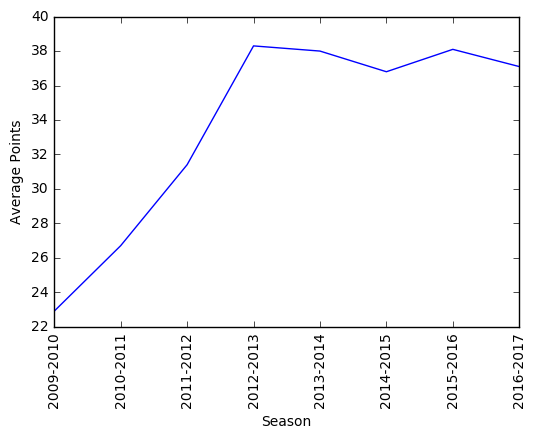

In [44]:
x = [0,1,2,3,4,5,6,7]
date = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017"]
plt.plot(data[1:,0][::-1])
plt.xticks(x, date)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Average Points")

从上图看出, 从新秀赛季开始的四个赛季, 场均得分飙升. 特别是12-13赛季, 场均得分上升最快的一年. 到后面就趋于稳定了. (2012年哈登从雷霆被交易到火箭, 从最佳第六人变成老大.)  
再来看一个助攻的数据.

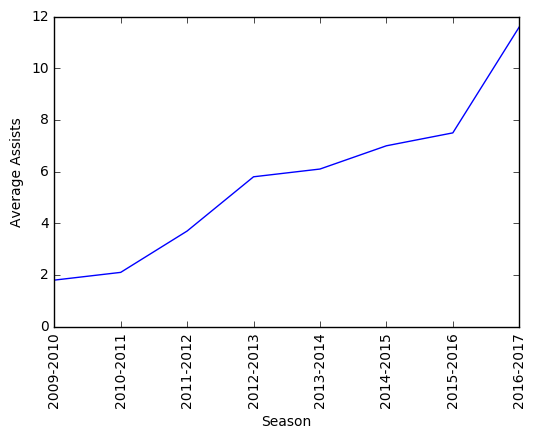

In [47]:
plt.plot(data[1:,6][::-1])
plt.xticks(x, date)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Average Assists")

本赛季哈登最大的变化就是助攻了, 目前(2016.12.07)场均助攻领跑全联盟.

### 1.2.5 将数据保存到文件

numpy可以从文件中读取数据, 也可以把数据保存到文件.

In [51]:
mtrx = random.rand(5,5)
mtrx

array([[ 0.48303761,  0.57801242,  0.10126259,  0.61861427,  0.49185432],
       [ 0.46071636,  0.58102006,  0.86664716,  0.96520178,  0.77837674],
       [ 0.34172302,  0.00867352,  0.42048377,  0.20449244,  0.21420407],
       [ 0.94114153,  0.14579259,  0.5252285 ,  0.75621482,  0.48957922],
       [ 0.92226393,  0.62632715,  0.27662832,  0.87058178,  0.07218224]])

In [61]:
np.savetxt("random-matrix.csv", mtrx, fmt="%.8f")

查看保存的数据:

In [62]:
!ls

JamesHarden.csv       Lecture-2-Numpy.ipynb random-matrix.csv


In [63]:
!head random-matrix.csv

0.48303761 0.57801242 0.10126259 0.61861427 0.49185432
0.46071636 0.58102006 0.86664716 0.96520178 0.77837674
0.34172302 0.00867352 0.42048377 0.20449244 0.21420407
0.94114153 0.14579259 0.52522850 0.75621482 0.48957922
0.92226393 0.62632715 0.27662832 0.87058178 0.07218224
